<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [23]:
# data prep
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['species'])

df.loc[df['species'] == 0.0, 'species'] = 'setosa' 
df.loc[df['species'] == 1.0, 'species'] = 'versicolor'
df.loc[df['species'] == 2.0, 'species'] = 'virginica'

versicolor_petal_length = df.loc[df['species']=='versicolor', 'petal length (cm)']
setosa_petal_length = df.loc[df['species']=='setosa', 'petal length (cm)']
virginica_petal_length = df.loc[df['species']=='virginica', 'petal length (cm)']

versicolor_petal_width = df.loc[df['species']=='versicolor', 'petal width (cm)']
setosa_petal_width = df.loc[df['species']=='setosa', 'petal width (cm)']
virginica_petal_width = df.loc[df['species']=='virginica', 'petal width (cm)']

In [16]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


In [17]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


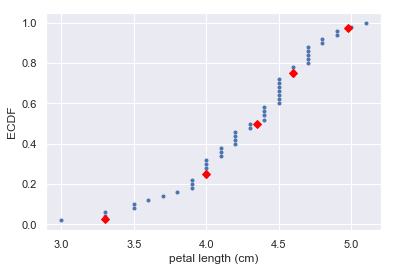

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_vers, y_vers = ecdf(versicolor_petal_length)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


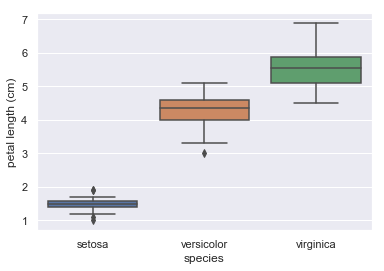

In [20]:
# Create box plot with Seaborn's default settings
sns.set()
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


In [21]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


In [22]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


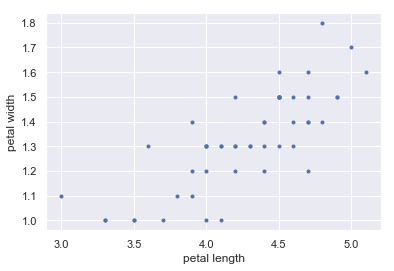

In [26]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length')
_ = plt.ylabel('petal width')

# Show the result
plt.show()

In [36]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

# extra - calc pearson co-efficient
print(petal_cov/(np.std(versicolor_petal_length) * np.std(versicolor_petal_width)))

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653
0.8027225393089968


In [29]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


In [ ]:
#